In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# reading the dataset

In [2]:
summ =pd.read_csv("train.csv")
data = pd.read_csv("train.csv")
data.head(10)

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
survived=data[data['Survived']==1]['Gender'].value_counts()

In [4]:
dead=data[data['Survived']==0]['Gender'].value_counts()

In [5]:
df = pd.DataFrame([survived,dead])
df.index = ['survived', 'dead']
df

,female,male
survived,233,109
dead,81,468


## Exploratory data analysis


In [6]:
women = data.loc[data.Gender == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [7]:
men = data.loc[data.Gender == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


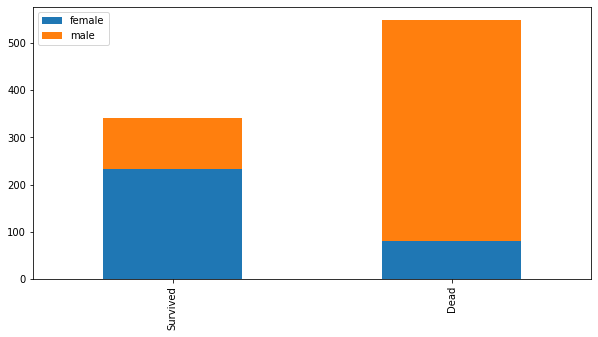

In [8]:
def bar_chart(feature):
    survived = data[data['Survived']==1][feature].value_counts()
    dead = data[data['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))
bar_chart('Gender')

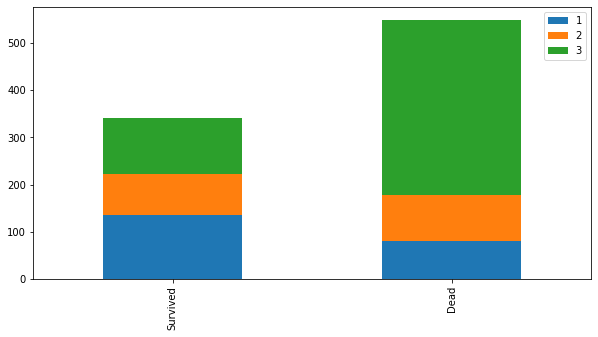

In [9]:
bar_chart('Pclass')

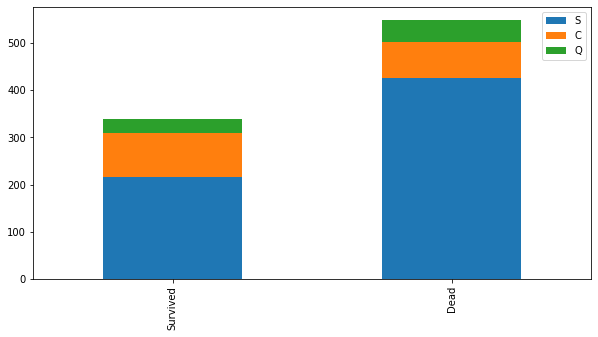

In [10]:
bar_chart('Embarked')

#### exploring survived or not by age


c:\Users\hossam gno\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Users\hossam gno\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


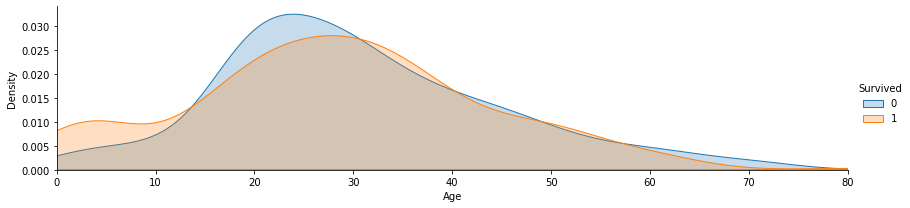

In [11]:
facet = sns.FacetGrid(data, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, data['Age'].max()))
facet.add_legend()
 
plt.show() 

## cleaning the data

In [12]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Gender           0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
def clean(data):
    data = data.drop(["Ticket", "PassengerId", "Name", "Cabin"], axis=1)
    
    cols = ["Age"]
    for col in cols:
        data[col].fillna(data[col].median(), inplace=True)
        
    data.Embarked.fillna("U", inplace=True)
    return data

data = clean(data)


In [14]:
data.isnull().sum()

Survived    0
Pclass      0
Gender      0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [15]:
data.head(3)

,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Gender    891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


### dealing with categorical data

In [17]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for col in data.select_dtypes(include='object').columns:
    data[col] = le.fit_transform(data[col])
    print(le.classes_)
      
data.head(5)

['female' 'male']
['C' 'Q' 'S' 'U']


,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


## Feature engineering


In [19]:
def Update_age(age):
    if age > 16 and  age <= 26:
        return 1
    if age > 26 and age <= 36:
        return 2
    if age > 36 and  age <=62:
        return 3
    if age > 62 :
        return 4        
    return 0
    
data["Age"] = data["Age"].apply(lambda x :Update_age(x) )
data

,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,1,1,0,7.2500,2
1,1,1,0,3,1,0,71.2833,0
2,1,3,0,1,0,0,7.9250,2
3,1,1,0,2,1,0,53.1000,2
4,0,3,1,2,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,2,0,0,13.0000,2
887,1,1,0,1,0,0,30.0000,2
888,0,3,0,2,1,2,23.4500,2
889,1,1,1,1,0,0,30.0000,0


In [20]:
from sklearn.preprocessing import StandardScaler
import numpy as np
data['Fare_log'] = np.log1p(data['Fare'])
scaler = StandardScaler()
data['Fare_standardized'] = scaler.fit_transform(data[['Fare']])

In [21]:

data.head(10)

,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked,Fare_log,Fare_standardized
0,0,3,1,1,1,0,7.2500,2,2.110213,-0.502445
1,1,1,0,3,1,0,71.2833,0,4.280593,0.786845
2,1,3,0,1,0,0,7.9250,2,2.188856,-0.488854
3,1,1,0,2,1,0,53.1000,2,3.990834,0.420730
4,0,3,1,2,0,0,8.0500,2,2.202765,-0.486337
5,0,3,1,2,0,0,8.4583,1,2.246893,-0.478116
6,0,1,1,3,0,0,51.8625,2,3.967694,0.395814
7,0,3,1,0,3,1,21.0750,2,3.094446,-0.224083
8,1,3,0,2,0,2,11.1333,2,2.495954,-0.424256
9,1,2,0,0,1,0,30.0708,0,3.436268,-0.042956


# training machine learning model

#### RandomForest model


In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV

In [23]:
y = data["Survived"]
X = data.drop(["Survived","Fare"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
model = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}


In [25]:
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=50, cv=3, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)
best_model = random_search.best_estimator_

y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Train Accuracy: {round( ( random_search.score(X_train,y_train)*100 ) , 2 )}%')
print(f'Test Accuracy: {accuracy:.4f}')


Train Accuracy: 88.9%
Test Accuracy: 0.8324


#### LogisticRegression model

In [26]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(X_train,y_train)
print(f'model trained with accuracy on test data {round( ( lg.score(X_test,y_test)*100 ) , 2 )}%')
print(f'model trained with accuracy on train data {round( ( lg.score(X_train,y_train)*100 ) , 2 )}%')

model trained with accuracy on test data 81.01%
model trained with accuracy on train data 80.2%


### preprocess_fuction

In [27]:
def preprocess(test_data):
    for col in test_data.select_dtypes(include='object').columns:
        test_data[col] = le.fit_transform(test_data[col])

    test_data = clean(test_data)
    test_data["Age"] = test_data["Age"].apply(lambda x :Update_age(x) )

    test_data['Fare_log'] = np.log1p(test_data['Fare'])
    test_data['Fare_standardized'] = scaler.transform(test_data[['Fare']])
    test_data = test_data.drop("Fare",axis=1)
    return(test_data)

#### submission_file

In [28]:
test =pd.read_csv("test.csv")
pas = test.copy()
test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [29]:
test = preprocess(test)
test.head(5)

,Pclass,Sex,Age,SibSp,Parch,Embarked,Fare_log,Fare_standardized
0,3,1,2,0,0,1,2.178064,-0.490783
1,3,0,3,1,0,2,2.079442,-0.507479
2,2,1,3,0,0,1,2.369075,-0.453367
3,3,1,2,0,0,2,2.268252,-0.474005
4,3,0,1,1,1,2,2.586824,-0.401017


In [30]:
test.isnull().sum()

Pclass               0
Sex                  0
Age                  0
SibSp                0
Parch                0
Embarked             0
Fare_log             1
Fare_standardized    1
dtype: int64

In [31]:
test['Fare_log'].fillna(test['Fare_log'].mean(), inplace=True)
test['Fare_standardized'].fillna(test['Fare_standardized'].mean(), inplace=True)

print(test.isnull().sum())

Pclass               0
Sex                  0
Age                  0
SibSp                0
Parch                0
Embarked             0
Fare_log             0
Fare_standardized    0
dtype: int64


In [32]:
test_predictions = best_model.predict(test)


submission = pd.DataFrame({
    'PassengerId': pas['PassengerId'],
    'Survived': test_predictions
})


submission.to_csv('submission.csv', index=False)

print("Submission file created: 'submission.csv'")

Submission file created: 'submission.csv'


c:\Users\hossam gno\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Sex
Feature names seen at fit time, yet now missing:
- Gender

  warnings.warn(message, FutureWarning)
